# Importing necessary packages

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Loading the data and exploring the data

In [2]:
df = pd.read_json('logins.json')
df.head(10)

,login_time
0,1970-01-01 20:13:18
1,1970-01-01 20:16:10
2,1970-01-01 20:16:37
3,1970-01-01 20:16:36
4,1970-01-01 20:26:21
5,1970-01-01 20:21:41
6,1970-01-01 20:12:16
7,1970-01-01 20:35:47
8,1970-01-01 20:35:38
9,1970-01-01 20:47:52


In [3]:
df.describe(datetime_is_numeric=True)

,login_time
count,93142
mean,1970-02-26 19:09:39.779648278
min,1970-01-01 20:12:16
25%,1970-02-04 10:37:19.750000
50%,1970-03-01 06:33:05.500000
75%,1970-03-22 04:01:10.750000
max,1970-04-13 18:57:38


As we can see, we have 93,142 observations over a span of a little over four months. One thing to note about this data set is that the login_time is set way back in 1970, which is very likely a mistake since 'Loging into' places didn't really start until later in history.

Now we resample our data in 15 min intervals:

In [4]:
df.resample('15T', on='login_time').count()

,login_time
login_time,
1970-01-01 20:00:00,2
1970-01-01 20:15:00,6
1970-01-01 20:30:00,9
1970-01-01 20:45:00,7
1970-01-01 21:00:00,1
...,...
1970-04-13 17:45:00,5
1970-04-13 18:00:00,5
1970-04-13 18:15:00,2


Assign it to a new variable:

In [5]:
df15 = df.resample('15T', on='login_time').count()
df15

,login_time
login_time,
1970-01-01 20:00:00,2
1970-01-01 20:15:00,6
1970-01-01 20:30:00,9
1970-01-01 20:45:00,7
1970-01-01 21:00:00,1
...,...
1970-04-13 17:45:00,5
1970-04-13 18:00:00,5
1970-04-13 18:15:00,2


Rename the feature name, reset the index and create a new feature for day of the week:

In [6]:
df15.rename(columns={'login_time': 'login_count'}, inplace=True)

In [7]:
df15.reset_index(inplace=True)

In [8]:
df15['day_of_week'] = df15.login_time.dt.day_name()

# Exploratory Data Analysis

Now let us analyze our data and find trends that help us understand the login behavior:

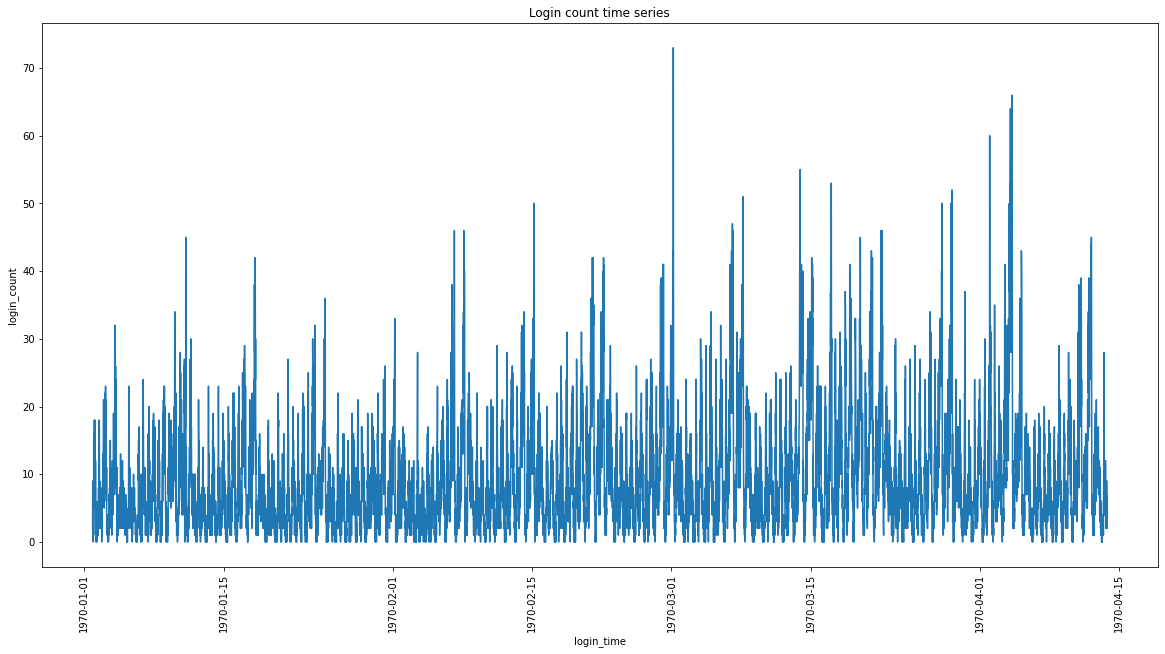

In [9]:
plt.figure(figsize=(20,10))
sns.lineplot(x='login_time', y='login_count', data=df15)
plt.xticks(rotation = 90)
plt.title('Login count time series')
plt.show()

There is no pattern in the login_count over the span of the four months of our dataset.

Let's see if there is a difference based on the weekdays:

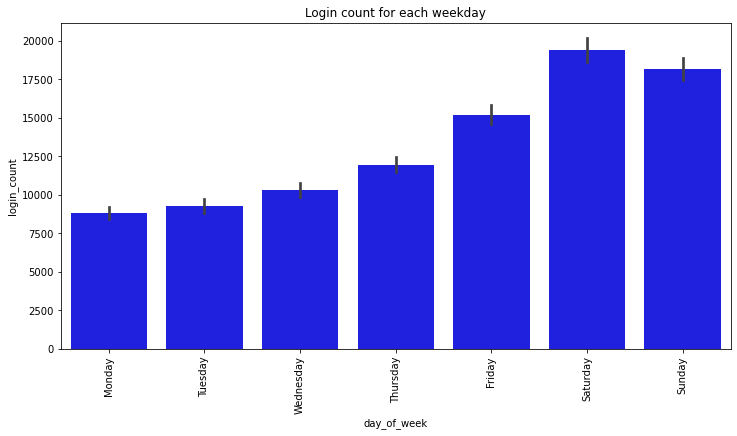

In [10]:
plt.figure(figsize=(12,6))
sns.barplot(data=df15, x='day_of_week', y='login_count', estimator=sum, order=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday', 'Sunday'], color='b')
plt.xticks(rotation = 90)
plt.title('Login count for each weekday')
plt.show()

There is a pattern in the weekdays. There is more activity towards the weekends, Saturday being the day with the most activity (more than double the activity on Mondays).

Now, let us see how the activity is distributed during the day:

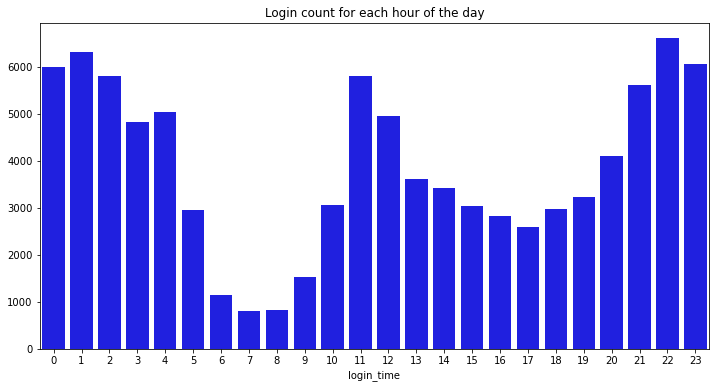

In [11]:
plt.figure(figsize=(12,6))
sns.barplot(data=df.groupby(df.login_time.dt.hour).count().rename(columns={'login_time': 'hour_count'}).T, color='b')
plt.title('Login count for each hour of the day')
plt.show()

This is interestring, the least activity happens from 7am to 8am. The highest activity hours being 12am, 1am, 2am, 11am, 10pm and 11pm. Maybe this data is from some kind of social media platform where night owls spend most of their time, going to be around 5am, along with working people that log in during lunch time and at night?

Let's see the growth of login counts during time:

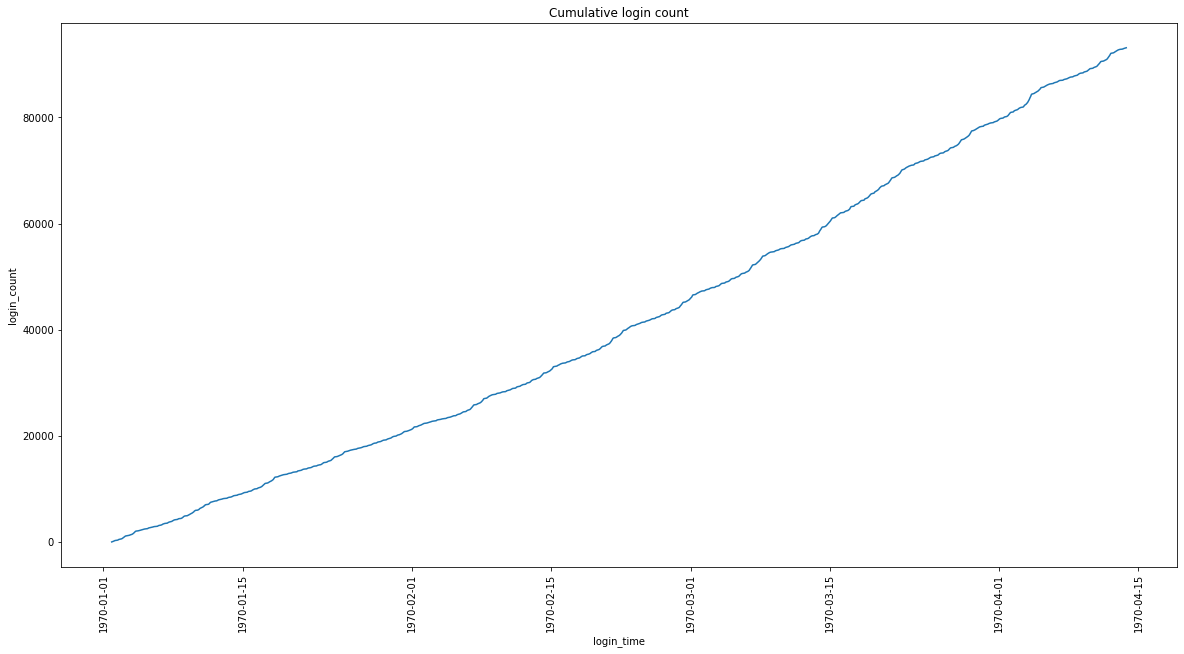

In [12]:
plt.figure(figsize=(20,10))
sns.lineplot(data=df15, x='login_time', y=df15.login_count.cumsum())
plt.xticks(rotation = 90)
plt.title('Cumulative login count')
plt.show()

It is a very steady growth over the 4 month period.

# Conclusions

- The dataset year doesn't seem right. Most likely a mistake in the system.
- The span of this dataset is too short. Because of this we are not able to see the patterns at the different seasons of the year. Maybe we could have match higher login counts to school breaks.
- There was no pattern in the login_count over the span of the four months of our dataset.
- There is a pattern in the weekdays. There is more activity towards the weekends, Saturday being the day with the most activity (more than double the activity on Mondays).
- The least activity happens from 7am to 8am. The highest activity hours being 12am, 1am, 2am, 11am, 10pm and 11pm. Maybe this data is from some kind of social media platform where night owls spend most of their time, going to be around 5am, along with working people that log in during lunch time and at night?
- There was a very steady growth of logins over the 4 month period.
